<a href="https://colab.research.google.com/github/BDouchet/SDATA/blob/main/TP_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import & Load 

Two datasets are used :

*  **house_rent** : made of two features (surface and monthly rent). The aim is to estimate the monthly rent based on the surface. It is composed of 545 flats localized in Paris.
*  **house_price** : which stores house prices in USA according to many other features (80). The data descripton is available [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='1O7J3Zw34gyaA6XpLqkdtLv7JIn_gISct'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('house_rent.csv')

id='1bw0xOuSlAt9mT66q7NudC6LqkLVHnTjx'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('house_price.csv')

In [4]:
df=pd.read_csv('house_rent.csv')
df

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
...,...,...
540,1490,48
541,2020,58
542,2050,70
543,1220,42


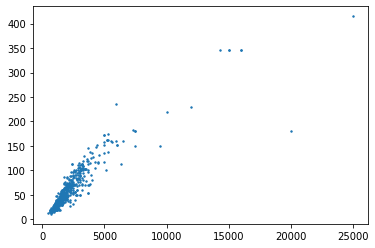

In [5]:
plt.scatter(df['loyer'],df['surface'],s=2)
plt.show()

# Single Linear Regression

Linear Regression performed on **house_rent** dataset. Estimation of the price according to the surface

## Remove outliers

Remove of the outliers :

*  price > 8000 €/month
*  surface > 200 m²

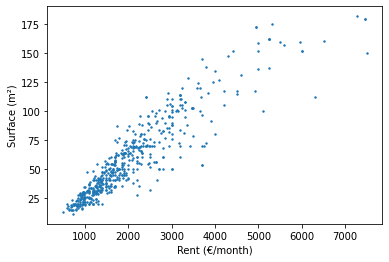

In [10]:
df.drop(df[df.loyer>8000].index,inplace=True)
df.drop(df[df.surface>200].index,inplace=True)

plt.scatter(df['loyer'],df['surface'],s=2)
plt.xlabel('Rent (€/month)')
plt.ylabel('Surface (m²)')
plt.show()

In [11]:
x=df.surface.to_numpy()
y=df.loyer.to_numpy()

print('Average Rent : '+ str(x.mean()))
print('Std Rent : '+ str(x.std()))
print()
print('Average Surface : '+ str(y.mean()))
print('Std Surface : '+ str(y.std()))
print()
print('covariance : '+str(np.cov(x,y)[0,1]))
print('correlation : '+str(np.corrcoef(x,y)[0,1]))

Average Rent : 58.6123595505618
Std Rent : 34.8957451670273

Average Surface : 2057.750936329588
Std Surface : 1157.8079878994151

covariance : 37115.6105887809
correlation : 0.9169244285569261


## Split

Split into two datasets : Training (0.8) and Testing (0.2).

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1000)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(427,) (107,) (427,) (107,)


## Linear Regression (Manual)

Calculation of the equation : $f(x) =\hat{β_0}*x + \hat{β_1}$ 

with $\hat{β_0} = \bar{y} − \hat{β_1}*\bar{x}$ 

and $\hat{β_1}=\frac{Cov(x,y)}{Var(x)}$

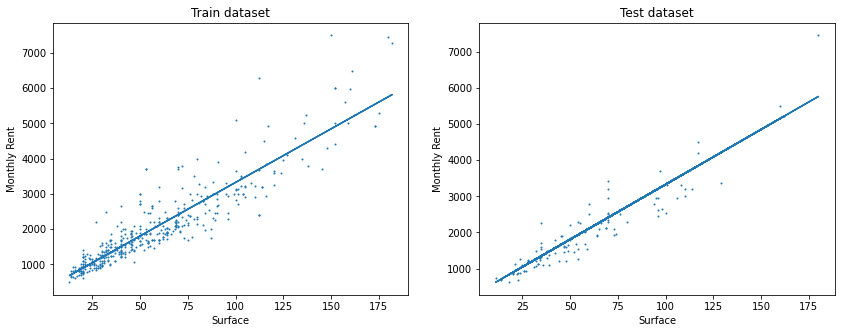

MSE Train : 229486.551
R2 Train : 0.831
MSE Test : 150316.932
R2 Test : 0.881


In [14]:
# Training
cov_mat=np.cov(X_train,y_train)
b1hat=cov_mat[0,1]/cov_mat[0,0]
b0hat=y_train.mean()-b1hat*X_train.mean()

# Prediction
yhat_train=np.array([b0hat+b1hat*x_i for x_i in X_train])
yhat_test=np.array([b0hat+b1hat*x_i for x_i in X_test])

# Metrics
from sklearn.metrics import mean_squared_error,r2_score
mse_train,r2_train=mean_squared_error(y_train,yhat_train),r2_score(y_train,yhat_train)
mse_test,r2_test=mean_squared_error(y_test,yhat_test),r2_score(y_test,yhat_test)

# Display
_,[ax1,ax2]=plt.subplots(ncols=2,nrows=1,figsize=(14,5))

ax1.scatter(X_train,y_train,s=1)
ax1.plot(X_train,yhat_train)
ax1.set_title('Train dataset')
ax1.set_xlabel('Surface')
ax1.set_ylabel('Monthly Rent')

ax2.scatter(X_test,y_test,s=1)
ax2.plot(X_test,yhat_test)
ax2.set_title('Test dataset')
ax2.set_xlabel('Surface')
ax2.set_ylabel('Monthly Rent')

plt.show()

print("MSE Train : "+ '%.3f' % mse_train)
print("R2 Train : "+ '%.3f' % r2_train)

print("MSE Test : "+ '%.3f' % mse_test)
print("R2 Test : "+ '%.3f' % r2_test)

## Linear Regression (sklearn)

With `sklearn.linear_model.LinearRegression`, the results are the same.

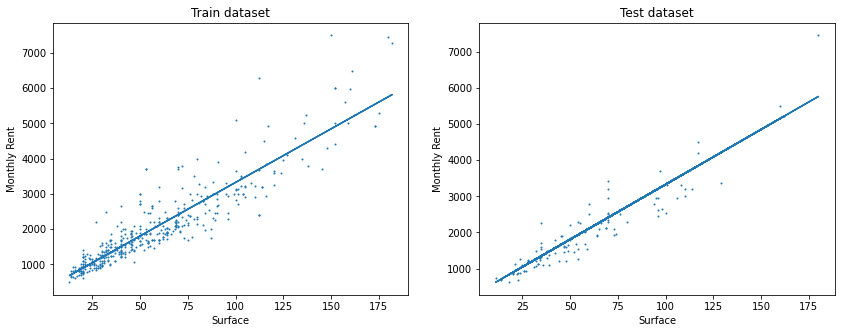

MSE Train : 229486.551
R2 Train : 0.831
MSE Test : 150316.932
R2 Test : 0.881


In [ ]:
from sklearn.linear_model import LinearRegression

# Training
lr=LinearRegression()
lr.fit(np.expand_dims(X_train,1),y_train)

# Prediction
yhat_train=lr.predict(np.expand_dims(X_train,1))
yhat_test=lr.predict(np.expand_dims(X_test,1))

# Metrics
from sklearn.metrics import mean_squared_error,r2_score
mse_train,r2_train=mean_squared_error(y_train,yhat_train),r2_score(y_train,yhat_train)
mse_test,r2_test=mean_squared_error(y_test,yhat_test),r2_score(y_test,yhat_test)

# Display
_,[ax1,ax2]=plt.subplots(ncols=2,nrows=1,figsize=(14,5))

ax1.scatter(X_train,y_train,s=1)
ax1.plot(X_train,yhat_train)
ax1.set_title('Train dataset')
ax1.set_xlabel('Surface')
ax1.set_ylabel('Monthly Rent')

ax2.scatter(X_test,y_test,s=1)
ax2.plot(X_test,yhat_test)
ax2.set_title('Test dataset')
ax2.set_xlabel('Surface')
ax2.set_ylabel('Monthly Rent')

plt.show()

print("MSE Train : "+ '%.3f' % mse_train)
print("R2 Train : "+ '%.3f' % r2_train)

print("MSE Test : "+ '%.3f' % mse_test)
print("R2 Test : "+ '%.3f' % r2_test)

# Multiple Linear Regression

MLR performed on **house_price** to estimate the price of an house according to many features.

In [15]:
data=pd.read_csv('house_price.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Preprocess

*  Split of dataset in x_data and y_data
*  Drop of columns where there is a lot of NaN Values : `['MiscFeature', 'PoolQC', 'Fence', 'FireplaceQu', 'Alley']`
*  Fill the others columns with :
  *  most frequent category for discrete variable
  *  mean of the other available values
*  Conversion of discrete variables with `LabelEncoder()`

In [18]:
from sklearn.preprocessing import LabelEncoder

data=pd.read_csv('house_price.csv')

# drop the id column and save the y_data column
y_data = data['SalePrice']
data.drop(['Id', 'SalePrice'], axis = 1, inplace = True)

# drop columns that have a lot of missing or NaN values
cols_to_drop = ['MiscFeature', 'PoolQC', 'Fence', 'FireplaceQu', 'Alley']
data.drop(cols_to_drop, axis = 1, inplace = True)

# fill columns that have a few NaN values
cols_with_nan = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

for col in cols_with_nan:
    if data[col].dtype == 'object':
        data.fillna(data[col].value_counts().index[0], inplace = True)
    else:
        data.fillna(data[col].mean(), inplace = True)
        
# convert columns with object datatypes into numbers by using Label Encoding
object_cols = [col for col in data.columns if data[col].dtype == 'object']

for col in object_cols:
    data[col] = data[col].astype('str')
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    
X_data=data[:]


#Data information after transformation
print('----------')
print("Data after transformation")
print('----------')
print("Data information")
print('----------')
data.info()
print('----------')
print("First data of the file")
print('----------')
print(data.head(10))


#Data analysis after transformation
print('----------')
print("Statistical properties")
print('----------')
print(data.describe())
print('----------')
print("Table size")
print('----------')
nb_val, nb_col = data.shape
print(data.shape)

----------
Data after transformation
----------
Data information
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 

Display of the correlation matrix

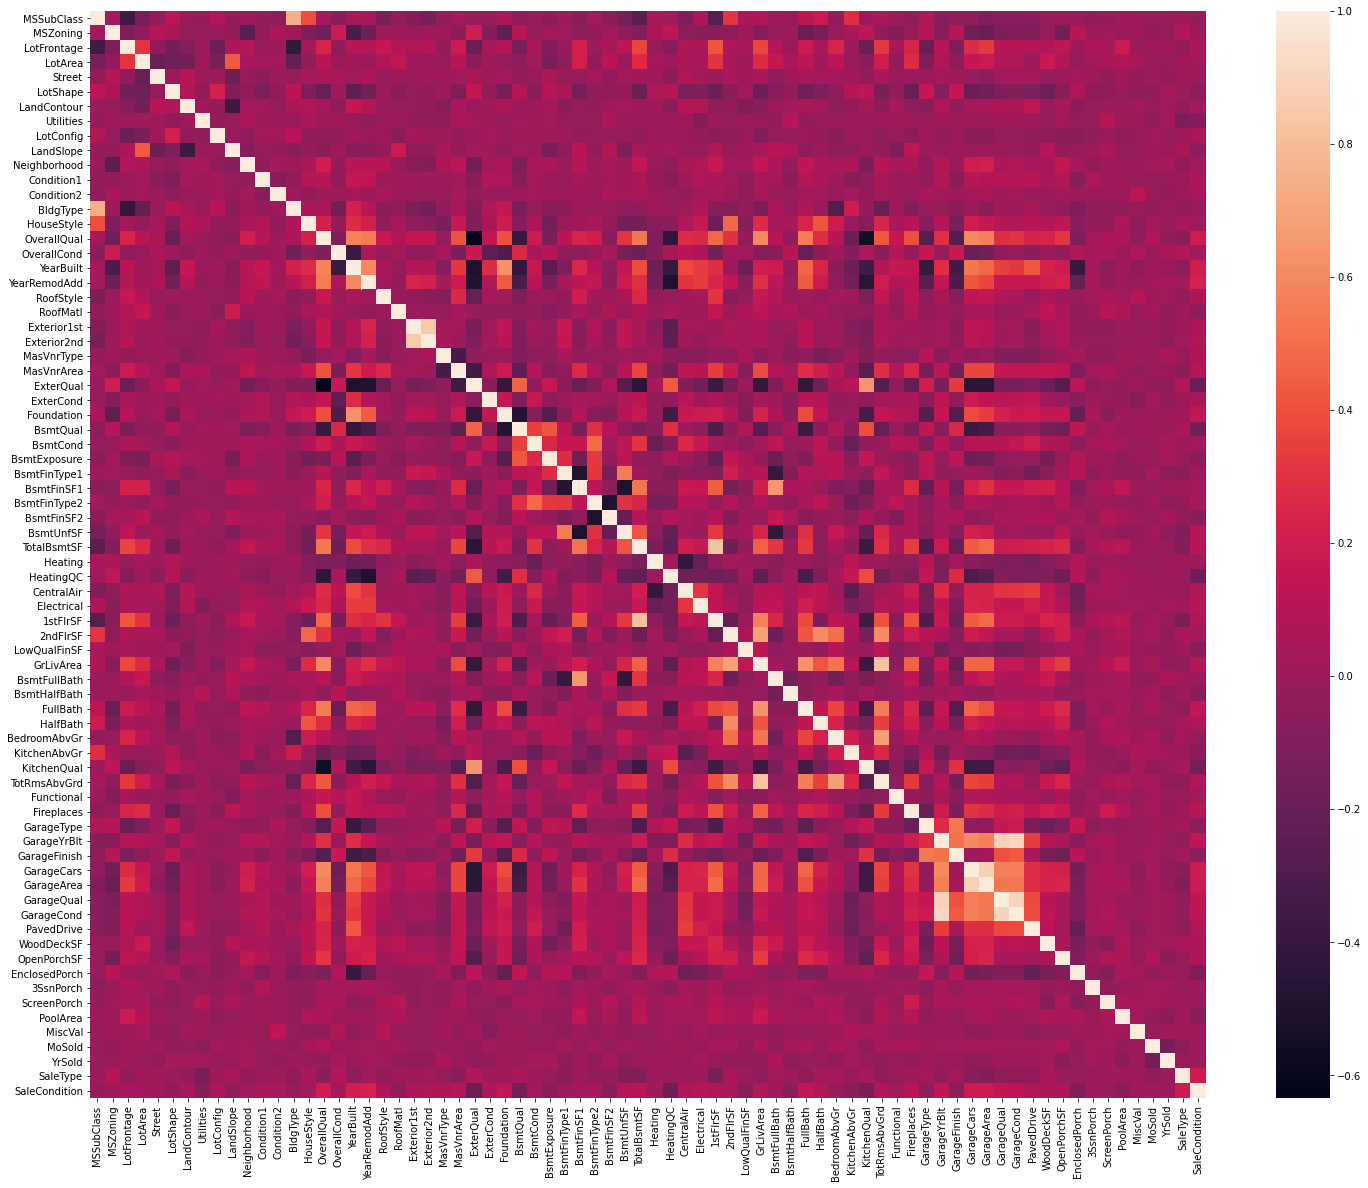

In [19]:
df_corr=data.corr()
import seaborn as sn
plt.figure(figsize=(25,20))
sn.heatmap(df_corr)
plt.show()

Split into two datasets : Training (0.8) and Testing (0.2).

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2,random_state=1000)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1168, 74) (292, 74) (1168,) (292,)


## MLR sklearn

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
coef_mlr=np.array(lr.coef_)
print(coef_mlr)
print(np.max(np.abs(lr.coef_)))

[-1.06599819e+02 -1.56542583e+03 -1.82966316e+02  3.31044338e-01
  2.91076804e+04 -1.51506921e+03  5.31252253e+03 -5.73517232e+04
 -2.45624834e+01  6.82969392e+03  4.63528434e+02 -1.83074248e+02
 -9.40483113e+03 -2.99788031e+03 -1.62646952e+03  1.18403801e+04
  5.59720955e+03  2.47959741e+02  1.98607999e+01  1.21354932e+03
  5.75799418e+03 -6.84059944e+02  6.05098585e+01  2.69813124e+03
  2.12513226e+01 -8.58340636e+03  8.81246399e+02 -1.02330074e+02
 -6.32811472e+03  3.32987520e+03 -3.45530931e+03 -6.19089602e+02
  3.94850519e+00  2.68804107e+03  1.37357881e+01 -6.13457009e+00
  1.15497232e+01 -2.67564319e+03 -8.61289368e+02  1.68590338e+02
 -1.01418310e+03  1.50885702e+01  1.84794566e+01 -7.76361243e+00
  2.58044144e+01  7.37464570e+03  2.13748737e+03  2.47803102e+03
 -1.02032278e+03 -4.00145994e+03 -1.24735034e+04 -9.24163573e+03
  4.07098863e+03  3.22553713e+03  5.84039620e+03  5.82696656e+02
 -1.38200705e+01 -6.64591233e+02  1.66044076e+04 -4.06162345e+00
 -1.72429891e+03  2.62425

In [ ]:
yhat_train=lr.predict(X_train)
yhat_test=lr.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error,r2_score
mse_train,r2_train=mean_squared_error(y_train,yhat_train),r2_score(y_train,yhat_train)
mse_test,r2_test=mean_squared_error(y_test,yhat_test),r2_score(y_test,yhat_test)


print("MSE Train : "+ '%.3f' % mse_train)
print("R2 Train : "+ '%.3f' % r2_train)

print("MSE Test : "+ '%.3f' % mse_test)
print("R2 Test : "+ '%.3f' % r2_test)

MSE Train : 991794301.340
R2 Train : 0.841
MSE Test : 845257758.004
R2 Test : 0.873


# MLR with Ridge

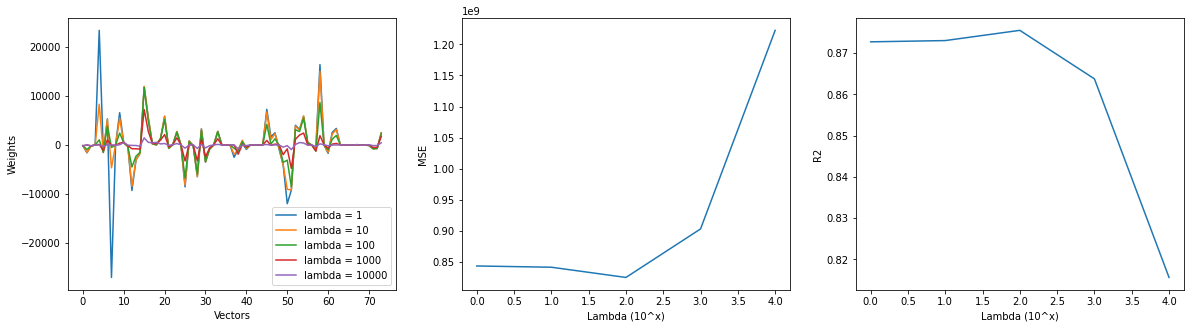

In [ ]:
from sklearn.linear_model import Ridge

_,[ax1,ax2,ax3]=plt.subplots(ncols=3,nrows=1,figsize=(20,5))

lambdas=[1,10,100,1000,10000]
coefs_ridge=[]
mse_ridge=[]
r2_ridge=[]
for lamb in lambdas:
    rd=Ridge(alpha=lamb)
    rd.fit(X_train,y_train)
    coefs_ridge.append(np.array(rd.coef_))
    mse_ridge.append(mean_squared_error(y_test,rd.predict(X_test)))
    r2_ridge.append(r2_score(y_test,rd.predict(X_test)))
    ax1.plot(np.arange(74),rd.coef_,label='lambda = '+str(lamb))
ax1.legend(loc='lower right')
ax1.set_xlabel('Vectors')
ax1.set_ylabel('Weights')

ax2.plot([0,1,2,3,4],mse_ridge)
ax2.set_xlabel('Lambda (10^x)')
ax2.set_ylabel('MSE')

ax3.plot([0,1,2,3,4],r2_ridge)
ax3.set_xlabel('Lambda (10^x)')
ax3.set_ylabel('R2')

plt.show()

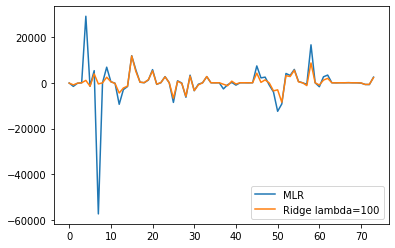

MSE MLR  : 845257758.004
R2 MLR : 0.873
MSE Ridge 100 : 825451576.423
R2 Ridge 100 : 0.876

Most Important feature : OverallQual
Less Important feature : LotArea


In [ ]:
plt.plot(np.arange(74),coef_mlr,label='MLR')
plt.plot(np.arange(74),coefs_ridge[2],label='Ridge lambda=100')
plt.legend(loc='lower right')
plt.show()

print("MSE MLR  : "+ '%.3f' % mse_test)
print("R2 MLR : "+ '%.3f' % r2_test)

print("MSE Ridge 100 : "+ '%.3f' % mse_ridge[2])
print("R2 Ridge 100 : "+ '%.3f' % r2_ridge[2])

print()
print('Most Important feature : '+data.columns[np.argmax(np.abs(coefs_ridge[2]))])
print('Less Important feature : '+data.columns[np.argmin(np.abs(coefs_ridge[2]))])

# Lasso

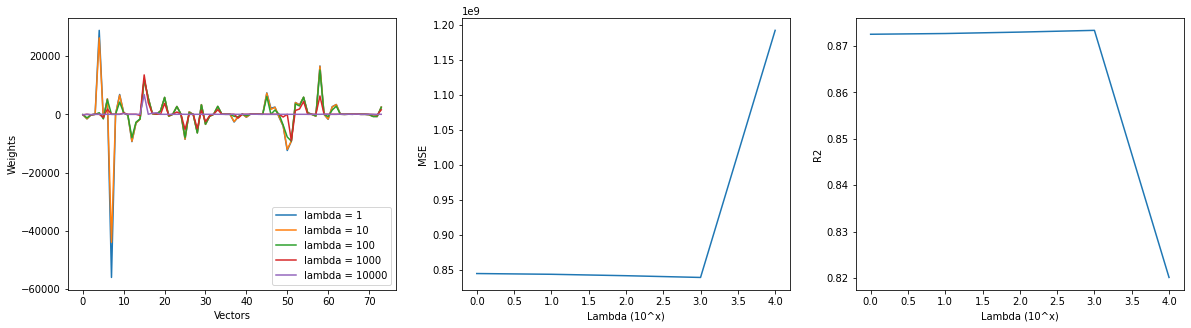

In [ ]:
from sklearn.linear_model import Lasso

_,[ax1,ax2,ax3]=plt.subplots(ncols=3,nrows=1,figsize=(20,5))

lambdas=[1,10,100,1000,10000]
coefs_lasso=[]
mse_lasso=[]
r2_lasso=[]
for lamb in lambdas:
    lss=Lasso(alpha=lamb)
    lss.fit(X_train,y_train)
    coefs_lasso.append(np.array(lss.coef_))
    mse_lasso.append(mean_squared_error(y_test,lss.predict(X_test)))
    r2_lasso.append(r2_score(y_test,lss.predict(X_test)))
    ax1.plot(np.arange(74),lss.coef_,label='lambda = '+str(lamb))
ax1.legend(loc='lower right')
ax1.set_xlabel('Vectors')
ax1.set_ylabel('Weights')

ax2.plot([0,1,2,3,4],mse_lasso)
ax2.set_xlabel('Lambda (10^x)')
ax2.set_ylabel('MSE')

ax3.plot([0,1,2,3,4],r2_lasso)
ax3.set_xlabel('Lambda (10^x)')
ax3.set_ylabel('R2')

plt.show()

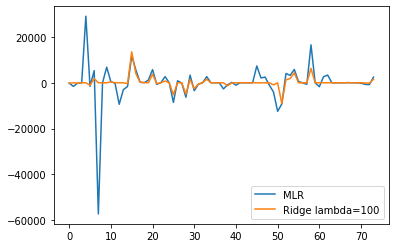

MSE MLR  : 845257758.004
R2 MLR : 0.873
MSE Ridge 100 : 839556110.489
R2 Ridge 100 : 0.873

Most Important feature : OverallQual
Less Important feature : MSZoning


In [ ]:
plt.plot(np.arange(74),coef_mlr,label='MLR')
plt.plot(np.arange(74),coefs_lasso[3],label='Ridge lambda=100')
plt.legend(loc='lower right')
plt.show()

print("MSE MLR  : "+ '%.3f' % mse_test)
print("R2 MLR : "+ '%.3f' % r2_test)

print("MSE Ridge 100 : "+ '%.3f' % mse_lasso[3])
print("R2 Ridge 100 : "+ '%.3f' % r2_lasso[3])

print()
print('Most Important feature : '+data.columns[np.argmax(np.abs(coefs_lasso[3]))])
print('Less Important feature : '+data.columns[np.argmin(np.abs(coefs_lasso[3]))])